**Graph Representation**

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def two_hop_neighbors(graph, vertex):
    """ Returns a set of vertices within two hops of the given vertex. """
    neighbors = set(graph[vertex])
    for neighbor in graph[vertex]:
        neighbors.update(graph[neighbor])
    neighbors.discard(vertex)
    return neighbors

def is_valid_htrdf(graph, labels):
    """ Checks if the given labels form a valid hop total Roman dominating function. """
    for vertex, label in labels.items():
        if label == 0:
            if not any(labels[neighbor] == 2 for neighbor in two_hop_neighbors(graph, vertex)):
                return False
        if label == 1:
            if not any(labels[neighbor] == 2 for neighbor in graph[vertex]):
                return False
    return True

def weight(labels):
    """ Returns the weight of the labeling. """
    return sum(labels.values())


**Solution generation and Neighbor Generation**

In [ ]:
def generate_random_solution(vertices):
    """ Generates a random labeling for the vertices. """
    return {vertex: random.choice([0, 1, 2]) for vertex in vertices}

def get_neighbors(solution, vertices):
    """ Generates neighboring solutions by modifying the current solution. """
    neighbors = []
    for _ in range(len(vertices)):
        new_solution = solution.copy()
        vertex = random.choice(vertices)
        new_solution[vertex] = random.choice([0, 1, 2])
        neighbors.append(new_solution)
    return neighbors


Implementing Artifical Bee colony (ABC) Algorithm

In [ ]:
def abc_algorithm(graph, num_bees=50, max_iterations=100, limit=20):
    vertices = list(graph.keys())
    population = [generate_random_solution(vertices) for _ in range(num_bees)]
    fitness = [weight(solution) if is_valid_htrdf(graph, solution) else float('inf') for solution in population]
    trial = [0] * num_bees

    for iteration in range(max_iterations):
        for i in range(num_bees):
            neighbors = get_neighbors(population[i], vertices)
            neighbor_fitness = [weight(neighbor) if is_valid_htrdf(graph, neighbor) else float('inf') for neighbor in neighbors]
            best_neighbor_index = neighbor_fitness.index(min(neighbor_fitness))
            if neighbor_fitness[best_neighbor_index] < fitness[i]:
                population[i] = neighbors[best_neighbor_index]
                fitness[i] = neighbor_fitness[best_neighbor_index]
                trial[i] = 0
            else:
                trial[i] += 1

        best_bee_index = fitness.index(min(fitness))
        onlooker_bees = random.choices(population, weights=[1/f if f != float('inf') else 0 for f in fitness], k=num_bees)

        for i in range(num_bees):
            neighbors = get_neighbors(onlooker_bees[i], vertices)
            neighbor_fitness = [weight(neighbor) if is_valid_htrdf(graph, neighbor) else float('inf') for neighbor in neighbors]
            best_neighbor_index = neighbor_fitness.index(min(neighbor_fitness))
            if neighbor_fitness[best_neighbor_index] < fitness[i]:
                population[i] = neighbors[best_neighbor_index]
                fitness[i] = neighbor_fitness[best_neighbor_index]
                trial[i] = 0
            else:
                trial[i] += 1

        for i in range(num_bees):
            if trial[i] > limit:
                population[i] = generate_random_solution(vertices)
                fitness[i] = weight(population[i]) if is_valid_htrdf(graph, population[i]) else float('inf')
                trial[i] = 0

    best_solution_index = fitness.index(min(fitness))
    return population[best_solution_index], fitness[best_solution_index]


**Graph Definition and Execution**

Best labels: {'A': 1, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}
Minimum weight: 1


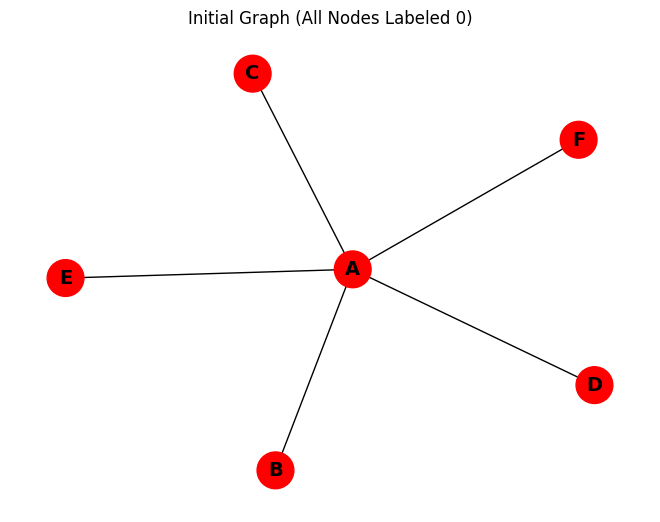

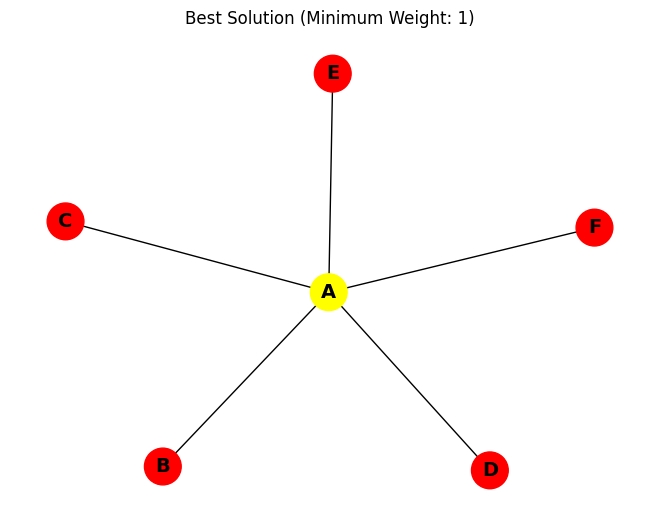

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Corrected graph definition
graph = {
    'A': [],
    'B': ['A'],
    'C': ['A'],
    'D': ['A'],
    'E': ['A'],
    'F': ['A'],
}

# Define necessary functions for the ABC algorithm (simplified version for illustration)
def generate_random_solution(vertices):
    return {vertex: random.choice([0, 1, 2]) for vertex in vertices}

def is_valid_htrdf(graph, labels):
    for node, neighbors in graph.items():
        if labels[node] == 0 and not any(labels[neighbor] > 0 for neighbor in neighbors):
            return False
    return True

def weight(labels):
    return sum(labels.values())

def abc_algorithm(graph, num_bees=50, max_iterations=100):
    vertices = list(graph.keys())
    population = [generate_random_solution(vertices) for _ in range(num_bees)]
    fitness = [weight(solution) if is_valid_htrdf(graph, solution) else float('inf') for solution in population]
    trial = [0] * num_bees

    for iteration in range(max_iterations):
        for i in range(num_bees):
            if fitness[i] != float('inf'):
                new_solution = generate_random_solution(vertices)
                new_fitness = weight(new_solution) if is_valid_htrdf(graph, new_solution) else float('inf')
                if new_fitness < fitness[i]:
                    population[i] = new_solution
                    fitness[i] = new_fitness
                    trial[i] = 0
                else:
                    trial[i] += 1

        best_solution = min(zip(population, fitness), key=lambda x: x[1])
        if best_solution[1] != float('inf'):
            return best_solution[0], best_solution[1]

    return None, float('inf')

best_labels, min_weight = abc_algorithm(graph)
print("Best labels:", best_labels)
print("Minimum weight:", min_weight)

def visualize_graph(graph, labels, title):
    G = nx.Graph(graph)
    color_map = {0: 'red', 1: 'yellow', 2: 'green'}
    node_colors = [color_map[labels[node]] for node in G.nodes()]

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=14, font_color='black', font_weight='bold')
    plt.title(title)
    plt.show()

# Visualize the initial graph
visualize_graph(graph, {node: 0 for node in graph}, "Initial Graph (All Nodes Labeled 0)")

# Visualize the graph with the best labels found
visualize_graph(graph, best_labels, f"Best Solution (Minimum Weight: {min_weight})")
